# 

In [5]:
import json
from greensight.utils import DIR_ROOT

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [7]:
data_path = DIR_ROOT / "data/green-belt.json"
assert data_path.is_file()

In [8]:
with open(data_path, "r") as infile:
    data = json.load(infile)
data = data["entities"]

In [22]:
from shapely import Polygon
import re

In [62]:
def coords_from_str(string: str) -> np.ndarray:
    ns = string.strip("()")
    ns = ns.split("), (, 
    return shapes
    pattern = r'\(\(\((.*?)\)\)\)'
    match = re.search(pattern, string)
    coordinates_string = match.group(1)
    return np.asarray([b.replace("(", "").replace(")", "").split(" ") for b in coordinates_string.split(",")]).astype(float)

In [222]:
# data[0]["geometry"]

In [224]:
s = deepcopy(data[0]["geometry"])
# s = s.replace("MULTIPOLYGON ", "")
# s = s.split("))")
# # s = s.split("((")
# s = [si.replace(",", " ").strip() for si in s]
# s = [si.replace("(", "").replace(")", "").split(" ") for si in s]
# s = [si for si in s if si != ""]
# s = [si for si in s if len(si) >1]
# s = [np.asarray(si) for si in s]
# s = [si.astype(float) for si in s]
# s = [si.reshape(-1, 2) for si in s]
# # s = [Polygon(si) for si in s]
s

'MULTIPOLYGON (((-2.724741 53.312529,-2.724493 53.312511,-2.724149 53.312461,-2.723921 53.312849,-2.723822 53.313016,-2.723526 53.313140,-2.723494 53.313135,-2.723502 53.313148,-2.724044 53.313223,-2.724264 53.313234,-2.724932 53.313244,-2.726923 53.313220,-2.727648 53.313221,-2.728009 53.313213,-2.728666 53.313165,-2.729733 53.313039,-2.729800 53.313079,-2.730704 53.312907,-2.731495 53.312746,-2.733163 53.312452,-2.733304 53.312417,-2.733545 53.312380,-2.733923 53.312335,-2.734201 53.312305,-2.734516 53.312283,-2.734694 53.312275,-2.735195 53.312284,-2.736485 53.312332,-2.737412 53.312379,-2.738262 53.312442,-2.738355 53.312463,-2.738365 53.312428,-2.738389 53.312430,-2.738392 53.312412,-2.738629 53.312434,-2.738625 53.312450,-2.738644 53.312452,-2.738636 53.312488,-2.740048 53.312655,-2.740758 53.312752,-2.741287 53.312852,-2.742217 53.313178,-2.742259 53.313180,-2.742670 53.313321,-2.743121 53.313499,-2.743425 53.313630,-2.743683 53.313753,-2.745419 53.314616,-2.746119 53.314627,-2.

In [229]:
pattern = r'\((.*?)\)'
matches = re.findall(pattern, s)
all_coordinates = []
for match in matches:
    # Split the match into individual coordinate pairs
    pairs = match.split(',')
    for pair in pairs:
        # Split each coordinate pair into x and y
        coord = tuple(map(lambda x: float(x.replace("(", "")), pair.split()))
        all_coordinates.append(coord)

# Step 4: Convert the list of coordinates into a NumPy array
coordinates_array = np.array(all_coordinates)

# Print the resulting NumPy array
print(coordinates_array)

[[-2.724741 53.312529]
 [-2.724493 53.312511]
 [-2.724149 53.312461]
 ...
 [-2.700918 53.386671]
 [-2.700916 53.38668 ]
 [-2.700915 53.386677]]


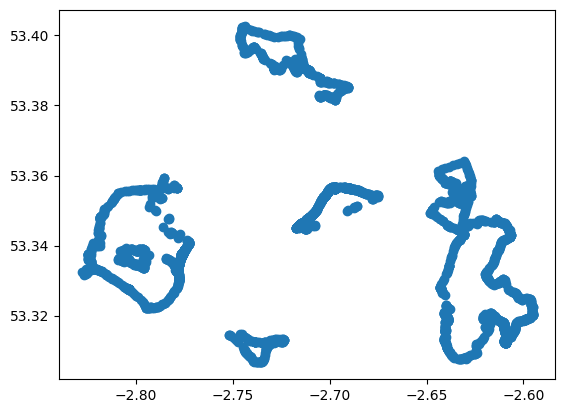

In [233]:
plt.scatter(*coordinates_array.T)

In [20]:
d_path = DIR_ROOT / "data/shapes/England_Green_Belt_2022_23_WGS84/England_Green_Belt_2022_23_WGS84.shp"
e_path =  DIR_ROOT / "data/shapes/England_Green_Belt_2021_22_WGS84/England_Green_Belt_2021_22_WGS84.shp"

In [21]:
assert d_path.is_file()
assert e_path.is_file()

In [14]:
import geopandas as gpd

In [24]:
df = gpd.read_file(d_path)
df2 = gpd.read_file(e_path)

In [25]:
df

,LAD_NM,LAD_CD,GB_Name,Area_ha,geometry
0,Amber Valley,E07000032,Derby and Nottingham,8647.904471,"MULTIPOLYGON (((-1.34303 53.071, -1.34304 53.0..."
1,Ashfield,E07000170,Derby and Nottingham,4521.598181,"MULTIPOLYGON (((-1.18089 53.11499, -1.18089 53..."
2,Barking and Dagenham,E09000002,London,527.776471,"MULTIPOLYGON (((0.15314 51.56697, 0.15325 51.5..."
3,Barnet,E09000003,London,2383.047837,"MULTIPOLYGON (((-0.20927 51.63758, -0.20937 51..."
4,Barnsley,E08000016,South and West Yorkshire,22393.050084,"MULTIPOLYGON (((-1.27572 53.52946, -1.27574 53..."
...,...,...,...,...,...
180,Worcester,E07000237,Birmingham,234.437679,"POLYGON ((-2.2173 52.22889, -2.21682 52.22856,..."
181,Wychavon,E07000238,Birmingham,8856.269951,"MULTIPOLYGON (((-1.93147 52.24809, -1.93124 52..."
182,Wyre,E07000128,Blackpool,684.236197,"MULTIPOLYGON (((-2.99898 53.86511, -2.99896 53..."
183,Wyre Forest,E07000239,Birmingham,10979.340962,"MULTIPOLYGON (((-2.27252 52.33329, -2.27256 52..."


In [32]:
df2.loc[df2["GB_Name"] == "Derby and Nottingham"]

,LAD_NM,LAD_CD,GB_Name,Area_ha,geometry
0,Amber Valley,E07000032,Derby and Nottingham,8647.905489,"MULTIPOLYGON (((-1.34303 53.071, -1.34304 53.0..."
1,Ashfield,E07000170,Derby and Nottingham,4521.598614,"MULTIPOLYGON (((-1.18089 53.11499, -1.18089 53..."
21,Broxtowe,E07000172,Derby and Nottingham,4901.995975,"MULTIPOLYGON (((-1.18654 52.92065, -1.18631 52..."
44,Derby,E06000015,Derby and Nottingham,243.532100,"MULTIPOLYGON (((-1.38358 52.92506, -1.38374 52..."
56,Erewash,E07000036,Derby and Nottingham,7839.439536,"MULTIPOLYGON (((-1.29926 52.91998, -1.29924 52..."
59,Gedling,E07000173,Derby and Nottingham,8791.066812,"POLYGON ((-1.16007 53.10394, -1.15945 53.10263..."
91,Newark and Sherwood,E07000175,Derby and Nottingham,6276.517055,"POLYGON ((-1.03937 53.07176, -1.0392 53.07169,..."
101,Nottingham,E06000018,Derby and Nottingham,736.090737,"MULTIPOLYGON (((-1.09673 52.95549, -1.09665 52..."
118,Rushcliffe,E07000176,Derby and Nottingham,16239.076591,"MULTIPOLYGON (((-0.94833 53.00313, -0.94813 53..."
132,South Derbyshire,E07000039,Derby and Nottingham,1704.474084,"POLYGON ((-1.40755 52.89072, -1.40761 52.89106..."


In [33]:
df.loc[df2["GB_Name"] == "Derby and Nottingham"]

,LAD_NM,LAD_CD,GB_Name,Area_ha,geometry
0,Amber Valley,E07000032,Derby and Nottingham,8647.904471,"MULTIPOLYGON (((-1.34303 53.071, -1.34304 53.0..."
1,Ashfield,E07000170,Derby and Nottingham,4521.598181,"MULTIPOLYGON (((-1.18089 53.11499, -1.18089 53..."
21,Broxtowe,E07000172,Derby and Nottingham,4901.996489,"MULTIPOLYGON (((-1.18654 52.92065, -1.18631 52..."
44,Derby,E06000015,Derby and Nottingham,243.531206,"MULTIPOLYGON (((-1.38358 52.92506, -1.38374 52..."
56,Erewash,E07000036,Derby and Nottingham,7839.439842,"MULTIPOLYGON (((-1.29926 52.91998, -1.29924 52..."
59,Gedling,E07000173,Derby and Nottingham,8791.067152,"POLYGON ((-1.16007 53.10394, -1.15945 53.10263..."
91,Newark and Sherwood,E07000175,Derby and Nottingham,6276.516668,"POLYGON ((-1.03937 53.07176, -1.0392 53.07169,..."
101,Nottingham,E06000018,Derby and Nottingham,736.090684,"MULTIPOLYGON (((-1.09673 52.95549, -1.09665 52..."
118,Rushcliffe,E07000176,Derby and Nottingham,16239.076352,"MULTIPOLYGON (((-0.94833 53.00313, -0.94813 53..."
132,South Derbyshire,E07000039,Derby and Nottingham,1704.474766,"POLYGON ((-1.40755 52.89072, -1.40761 52.89106..."
